<h1>Importando CSV</h1>

In [25]:
import pandas as pd
import numpy as np

df_codingdata = pd.read_csv("../../Outputs/codingdata_vidyo4_22.csv",sep="\t", names=["baseqp","cost","cunumberpel","currbtdepth","currdepth","currmtdepth","currqtdepth","currtrdepth","diagavg",
      "diagsad","diavar","diffminmax","distortion","fracbits","height","max","min","modetype","poc","qp",
      "pelavg","pelcornersavg","peldiffdiagonal","peldifffullcorneravg","squaredcu","videoresheight","videoreswidth",
      "treetype","width","x","y","prevpocheight","prevpocwidth","thisheightminusprevheight","thiswidthminusprevwidth",
      "thissizeminusprevsize"])

df_codingdata.query("cost > 0 and poc > 0")

df_desfecho = pd.read_csv("../../Outputs/encodeddata_vidyo4_22.csv",sep="\t", index_col=0 ,names=["poc","depth","x","y","w","h"])

pocs = np.unique(df_desfecho['poc'])

df_desfecho_collection = {}

for ppoc in pocs:
      df_desfecho_collection[ppoc] = df_desfecho.query("@ppoc == poc")

# df_codingdata = df_codingdata.query("x < 128 and y < 128 and poc == 0")
# df_desfecho = df_desfecho.query("x < 128 and y < 128 and poc == 0")


In [26]:
def setTarget(line) :
    
    xI = line['x']   
    yI = line['y']
    h = line['height']
    w = line['width']
    poc = line['poc']
    
    xF = xI+w-1
    yF = yI+h-1

    filtered_target = df_desfecho_collection[poc].query('x < @xF and y < @yF and x >= @xI and y >= @yI')
    
   

    if(len(filtered_target) <= 1):
        return 0 #Dont split
    else :
        return 1 #Split
    



In [27]:
targets = df_codingdata.apply(setTarget , axis=1)

KeyboardInterrupt: 

In [28]:
tgts = np.zeros(df_codingdata.shape[0])

i = 0
for index, row in df_codingdata.iterrows():
    tgts[i] = setTarget(row)
    i = i+1



In [82]:
df_codingdata['target'] = targets

In [83]:
print(len(df_codingdata[df_codingdata['target']==0]))
print(len(df_codingdata[df_codingdata['target']==1]))

397946
139345


In [84]:
dados = df_codingdata.query('poc > 0 and cost > 0').filter(['cost',"cunumberpel","currbtdepth","currdepth","currmtdepth","currqtdepth","currtrdepth","diagavg",
      "diagsad","diavar","diffminmax","distortion","fracbits","height","max","min","modetype","qp",
      "pelavg","pelcornersavg","peldiffdiagonal","peldifffullcorneravg","squaredcu","videoresheight","videoreswidth",
      "treetype","width","prevpocheight","prevpocwidth","thisheightminusprevheight","thiswidthminusprevwidth",
      "thissizeminusprevsize",'target'])



In [85]:
from sklearn.model_selection import train_test_split

treino, teste = train_test_split(dados, test_size=0.2)
print("Tamanos dos conjuntos (treino, teste):", len(treino), len(teste))

Tamanos dos conjuntos (treino, teste): 162056 40515


In [86]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=0, criterion="entropy")
X_treino = dados.drop('target', axis='columns')
y_treino = dados['target']

model = clf.fit(X_treino, y_treino)

In [87]:
from sklearn.metrics import accuracy_score

X_teste = dados.drop('target', axis='columns')
y_teste = dados['target']

predicoes = model.predict(X_teste)

acc = accuracy_score(y_teste, predicoes)
print(acc)

1.0


[Text(0.6228123860399256, 0.9895833333333334, 'x[31] <= -16.0\nentropy = 0.973\nsamples = 202571\nvalue = [81598, 120973]'),
 Text(0.34821014933538924, 0.96875, 'x[12] <= 1091340.5\nentropy = 0.966\nsamples = 96504\nvalue = [58658, 37846]'),
 Text(0.15574625553213425, 0.9479166666666666, 'x[31] <= -3712.0\nentropy = 0.92\nsamples = 70918\nvalue = [47161, 23757]'),
 Text(0.01685704464102989, 0.9270833333333334, 'x[10] <= 170.5\nentropy = 0.61\nsamples = 7038\nvalue = [5981, 1057]'),
 Text(0.008997317802622607, 0.90625, 'x[31] <= -3904.0\nentropy = 0.559\nsamples = 6569\nvalue = [5712, 857]'),
 Text(0.0033330780167647243, 0.8854166666666666, 'x[0] <= 931382.469\nentropy = 0.428\nsamples = 2744\nvalue = [2504, 240]'),
 Text(0.00040850650977463526, 0.8645833333333334, 'x[19] <= 245.5\nentropy = 0.144\nsamples = 391\nvalue = [383, 8]'),
 Text(0.00020425325488731763, 0.84375, 'x[18] <= 230.0\nentropy = 0.684\nsamples = 22\nvalue = [18, 4]'),
 Text(0.00013616883659154508, 0.8229166666666666, 

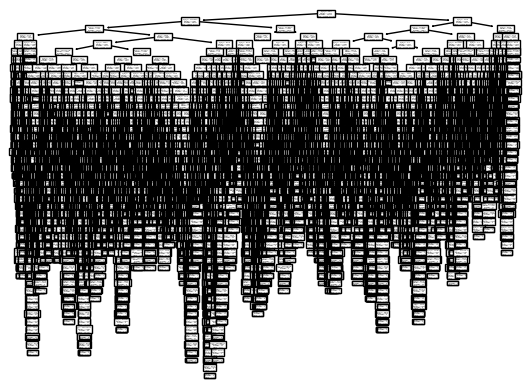

In [63]:
tree.plot_tree(model)